## 1. 행정구역

대한민국 행정구역 - 2011/ 2012/ 2013/ 2018  
https://github.com/southkorea/southkorea-maps
https://github.com/southkorea/southkorea-maps/blob/master/kostat/2018/json/skorea-provinces-2018-geo.json
https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json

대한민국 비공식 행정동경계 - 2012 ~ 2020  
https://github.com/vuski/admdongkor

전세계 행정구역   
https://gadm.org/download_country_v3.html

## 2. 대한민국 기타

OSM(Open Street Map) - Download South Korea (압축해제 전 약 240MB. 해제 후 약 650MB)   
http://download.geofabrik.de/asia/south-korea.html

OSM의 레이어-개체 타입  
https://wiki.openstreetmap.org/wiki/Map_features

서울생활인구  
http://data.seoul.go.kr/dataVisual/seoul/seoulLivingPopulation.do

## 3. 기타 공개데이터

전세계 무료 GIS 데이터 리스트  
https://freegisdata.rtwilson.com/

세계 도시 정보  
https://simplemaps.com/data/world-cities

30-Meter SRTM Tile Downloader  
http://dwtkns.com/srtm30m/

## 4. 공간데이터 관련

공간데이터 조회/ 포맷 변환/ 형상 단순화  
https://mapshaper.org/

지도 상의 경위도 좌표 확인  
http://teczno.com/squares/#15.75/36.36822/127.38820

표준 국가코드  
https://ko.wikipedia.org/wiki/ISO_3166-1

배경지도 비교/검토   
https://mc.bbbike.org/mc/

## 5. OSM에서 편의점만 찾아서 공간시각화 해보기

출처 : https://janakiev.com/blog/openstreetmap-with-python-and-overpass-api/

In [12]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="KR"][admin_level=2];
(node["shop"="convenience"](area);  
 way["shop"="convenience"](area);
 rel["shop"="convenience"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [13]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.56.8 7d656e78',
 'osm3s': {'timestamp_osm_base': '2021-01-21T04:05:02Z',
  'timestamp_areas_base': '2021-01-21T03:44:03Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 357926006,
   'lat': 37.50911,
   'lon': 126.87849,
   'tags': {'brand': '7 ELEVEN',
    'brand:wikidata': 'Q259340',
    'highway': 'bus_stop',
    'name': '세븐일레븐',
    'name:en': 'Seven Eleven',
    'name:ja': 'セブン-イレブン',
    'name:ko': '세븐일레븐',
    'name:ko-Latn': 'Sebeunillebeun',
    'operator': '코리아세븐',
    'operator:en': 'KOREA SEVEN',
    'payment:american_express': 'yes',
    'payment:cash': 'yes',
    'payment:coins': 'yes',
    'payment:credit_cards': 'yes',
    'payment:debit_cards': 'yes',
    'payment:diners_club': 'yes',
    'payment:discover_card': 'yes',
    'payment:jcb': 'yes',
    'payment:mastercard': 'yes',
    'payment:notes': 'yes',

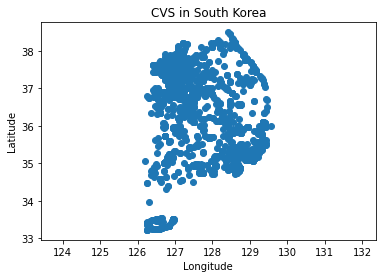

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list

coords = []
cnt = 0

for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
    cnt += 1
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('CVS in South Korea') #제목에 한글을 넣으면 어떻게 될까요?
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [15]:
cnt

5095

In [16]:
print(coords)

[(126.87849, 37.50911), (127.5327427, 34.9522446), (126.914787, 37.481003), (126.8582812, 37.5223568), (126.89672, 37.53239), (126.962368, 37.569534), (126.9986424, 37.5826248), (126.8690763, 37.5218065), (129.088232, 35.195558), (128.5976339, 35.8713683), (128.6089847, 35.872188), (126.7225934, 37.4909623), (126.667818, 37.512217), (126.9050898, 35.1852842), (126.871688, 35.213607), (126.90233, 35.177136), (126.9351671, 35.1747519), (127.3969245, 36.4003763), (127.4270525, 36.3743676), (127.3320595, 36.3482649), (127.3244729, 36.3878151), (127.3145186, 36.3870892), (126.7181142, 37.688085), (127.7645451, 37.8477316), (126.783727, 37.5268936), (127.9704938, 37.34021), (127.9299138, 37.3558383), (128.872884, 37.776392), (128.874522, 37.7766548), (129.1663926, 37.4547593), (127.0596011, 37.2334837), (127.0680741, 37.159777), (127.1414999, 36.7780442), (127.2058885, 36.8809754), (128.3662177, 36.0879351), (128.363754, 36.1174425), (129.3713683, 36.0594058), (127.1680435, 35.8265606), (128

## 6. 상가업소 정보 조회 및 시각화

참조 : https://lemontia.tistory.com/895 

소상공인시장진흥공단_상가(상권)정보에서 "반경내 상가업소 조회" API를 활용 
https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15012005

로그인 후 위 URL에서 활용신청을 하여 인증키를 받아야 함.  
인증키를 받더라도 최소 20분 이상 정도는 기다려야 리턴값이 정상적으로 받아짐 

In [17]:
#소상공인시장진흥공단 API 키 정보 가져오기 
f = open('../../etc/shopinfo.txt', 'r')
lines = f.readlines()
accesskey = lines[0]

In [18]:
import urllib.request

#특정 좌표에서 반경 500m 내의 상점 정보 가져오기 
#http://apis.data.go.kr/B553077/api/open/sdsc/storeListInRadius?radius=반경거리(m)&cx=경도&cy=위도&type=json&serviceKey=인증키
url = "http://apis.data.go.kr/B553077/api/open/sdsc/storeListInRadius?&radius=500&cx=126.978221&cy=37.566668&type=json&serviceKey=" + accesskey 

response = urllib.request.urlopen(url)
json_str = response.read().decode("utf-8")

In [20]:
json_str

'{\n\t"header" : {\n\t\t"description" : "소상공인시장진흥공단 반경내 상가업소정보"\n\t\t,"columns" : ["상가업소번호","상호명","지점명","상권업종대분류코드","상권업종대분류명","상권업종중분류코드","상권업종중분류명","상권업종소분류코드","상권업종소분류명","표준산업분류코드","표준산업분류명","시도코드","시도명","시군구코드","시군구명","행정동코드","행정동명","법정동코드","법정동명","PNU코드","대지구분코드","대지구분명","지번본번지","지번부번지","지번주소","도로명코드","도로명","건물본번지","건물부번지","건물관리번호","건물명","도로명주소","구우편번호","신우편번호","동정보","층정보","호정보","경도","위도"]\n\t\t,"stdrYm" : "202009"\n\t\t,"resultCode" : "00"\n\t\t,"resultMsg" : "NORMAL SERVICE"\n\t},\n\t"body" : {\n\t\t\t"items" : [\n\t\t\t\t{\n\t\t\t\t"bizesId" : "10142207"\n\t\t\t\t,"bizesNm" : "카페아모카"\n\t\t\t\t,"brchNm" : ""\n\t\t\t\t,"indsLclsCd" : "Q"\n\t\t\t\t,"indsLclsNm" : "음식"\n\t\t\t\t,"indsMclsCd" : "Q12"\n\t\t\t\t,"indsMclsNm" : "커피점/카페"\n\t\t\t\t,"indsSclsCd" : "Q12A01"\n\t\t\t\t,"indsSclsNm" : "커피전문점/카페/다방"\n\t\t\t\t,"ksicCd" : "I56220"\n\t\t\t\t,"ksicNm" : "비알콜 음료점업"\n\t\t\t\t,"ctprvnCd" : "11"\n\t\t\t\t,"ctprvnNm" : "서울특별시"\n\t\t\t\t,"signguCd" : "11140"\n\t\t\t\t,"signguNm" : "중구"\

In [21]:
import json
json_object = json.loads(json_str)
json_object

{'header': {'description': '소상공인시장진흥공단 반경내 상가업소정보',
  'columns': ['상가업소번호',
   '상호명',
   '지점명',
   '상권업종대분류코드',
   '상권업종대분류명',
   '상권업종중분류코드',
   '상권업종중분류명',
   '상권업종소분류코드',
   '상권업종소분류명',
   '표준산업분류코드',
   '표준산업분류명',
   '시도코드',
   '시도명',
   '시군구코드',
   '시군구명',
   '행정동코드',
   '행정동명',
   '법정동코드',
   '법정동명',
   'PNU코드',
   '대지구분코드',
   '대지구분명',
   '지번본번지',
   '지번부번지',
   '지번주소',
   '도로명코드',
   '도로명',
   '건물본번지',
   '건물부번지',
   '건물관리번호',
   '건물명',
   '도로명주소',
   '구우편번호',
   '신우편번호',
   '동정보',
   '층정보',
   '호정보',
   '경도',
   '위도'],
  'stdrYm': '202009',
  'resultCode': '00',
  'resultMsg': 'NORMAL SERVICE'},
 'body': {'items': [{'bizesId': '10142207',
    'bizesNm': '카페아모카',
    'brchNm': '',
    'indsLclsCd': 'Q',
    'indsLclsNm': '음식',
    'indsMclsCd': 'Q12',
    'indsMclsNm': '커피점/카페',
    'indsSclsCd': 'Q12A01',
    'indsSclsNm': '커피전문점/카페/다방',
    'ksicCd': 'I56220',
    'ksicNm': '비알콜 음료점업',
    'ctprvnCd': '11',
    'ctprvnNm': '서울특별시',
    'signguCd': '11140',
    'signguNm': '중구

In [22]:
# json을 Pandas 데이터프레임 형식으로 변환 
import pandas as pd
from pandas.io.json import json_normalize

body = [json_object['body']['items']]
body

[[{'bizesId': '10142207',
   'bizesNm': '카페아모카',
   'brchNm': '',
   'indsLclsCd': 'Q',
   'indsLclsNm': '음식',
   'indsMclsCd': 'Q12',
   'indsMclsNm': '커피점/카페',
   'indsSclsCd': 'Q12A01',
   'indsSclsNm': '커피전문점/카페/다방',
   'ksicCd': 'I56220',
   'ksicNm': '비알콜 음료점업',
   'ctprvnCd': '11',
   'ctprvnNm': '서울특별시',
   'signguCd': '11140',
   'signguNm': '중구',
   'adongCd': '1114055000',
   'adongNm': '명동',
   'ldongCd': '1114010300',
   'ldongNm': '태평로1가',
   'lnoCd': '1114010300200610021',
   'plotSctCd': '1',
   'plotSctNm': '대지',
   'lnoMnno': 61,
   'lnoSlno': 21,
   'lnoAdr': '서울특별시 중구 태평로1가 61-21',
   'rdnmCd': '111404103195',
   'rdnm': '서울특별시 중구 세종대로21길',
   'bldMnno': 40,
   'bldSlno': '',
   'bldMngNo': '1114010300100610021018835',
   'bldNm': '',
   'rdnmAdr': '서울특별시 중구 세종대로21길 40',
   'oldZipcd': '100101',
   'newZipcd': '04519',
   'dongNo': '',
   'flrNo': '2',
   'hoNo': '',
   'lon': 126.975839866054,
   'lat': 37.5682536979111},
  {'bizesId': '11469971',
   'bizesNm': '하이

In [23]:
# json에서 실제 필요한 부분의 정보를 Pandas Dataframe으로 변환 
df_shop = json_normalize(json_object['body']['items'])

<ipython-input-23-7be0f798d94d>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_shop = json_normalize(json_object['body']['items'])


In [24]:
df_shop.info()
df_shop.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bizesId     20 non-null     object 
 1   bizesNm     20 non-null     object 
 2   brchNm      20 non-null     object 
 3   indsLclsCd  20 non-null     object 
 4   indsLclsNm  20 non-null     object 
 5   indsMclsCd  20 non-null     object 
 6   indsMclsNm  20 non-null     object 
 7   indsSclsCd  20 non-null     object 
 8   indsSclsNm  20 non-null     object 
 9   ksicCd      20 non-null     object 
 10  ksicNm      20 non-null     object 
 11  ctprvnCd    20 non-null     object 
 12  ctprvnNm    20 non-null     object 
 13  signguCd    20 non-null     object 
 14  signguNm    20 non-null     object 
 15  adongCd     20 non-null     object 
 16  adongNm     20 non-null     object 
 17  ldongCd     20 non-null     object 
 18  ldongNm     20 non-null     object 
 19  lnoCd       20 non-null     obj

,bizesId,bizesNm,brchNm,indsLclsCd,indsLclsNm,indsMclsCd,indsMclsNm,indsSclsCd,indsSclsNm,ksicCd,...,bldMngNo,bldNm,rdnmAdr,oldZipcd,newZipcd,dongNo,flrNo,hoNo,lon,lat
0,10142207,카페아모카,,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114010300100610021018835,,서울특별시 중구 세종대로21길 40,100101,04519,,2,,126.975840,37.568254
1,11469971,하이모시청레이디점,시청레이디점,D,소매,D03,종합소매점,D03B04,시장/종합상가,G47129,...,1114011400103400006022892,대한일보빌딩,서울특별시 중구 서소문로 138,100865,04514,,11,,126.976288,37.563644
2,10175971,태기산더덕순대,,Q,음식,Q10,별식/퓨전요리,Q10A05,순대전문점,I56111,...,1114011300100120004022560,,서울특별시 중구 세종대로14길 29,100080,04526,,,,126.978302,37.562878
3,11214611,송원스끼야끼샤브샤브,,Q,음식,Q10,별식/퓨전요리,Q10A02,샤브샤브전문,I56111,...,1114011300100140005022308,,서울특별시 중구 세종대로18길 22,100080,04526,,,,126.978371,37.563617
4,11099386,곤트란쉐리에롯데명동,,Q,음식,Q14,기타음식업,Q14A02,고속도로휴게소,I56199,...,1114011100100010000022218,롯데백화점본점,서울특별시 중구 을지로 30,100721,04533,,4,,126.981718,37.564718
5,11463697,포타이,롯데백화점소공점,Q,음식,Q10,별식/퓨전요리,Q10A08,동남아음식전문점,I56119,...,1114010400101800006023330,롯데호텔,서울특별시 중구 을지로 30,100721,04533,,35,,126.980985,37.565334
6,11577571,보비런던,,Q,음식,Q09,유흥주점,Q09A08,빠/카페/스탠드빠,I56211,...,1114010400101800006023330,롯데호텔,서울특별시 중구 을지로 30,100721,04533,,35,,126.980985,37.565334
7,11613357,소니롯데백화점본점,롯데백화점본점,D,소매,D12,가전제품소매,D12A04,수입가전제품판매,G47320,...,1114010400101800006023330,롯데호텔,서울특별시 중구 을지로 30,100721,04533,,8,,126.980985,37.565334
8,11713150,MAC롯데백화점본점,롯데백화점본점,D,소매,D16,화장품소매,D16A01,화장품판매점,G47813,...,1114010400101800006023330,롯데호텔,서울특별시 중구 을지로 30,100721,04533,,1,,126.980985,37.565334
9,11722635,엠비오롯데본점,롯데본점,D,소매,D05,의복의류,D05A09,남성의류전문점,,...,1114010400101800006023330,롯데호텔,서울특별시 중구 을지로 30,100721,04533,,5,,126.980985,37.565334


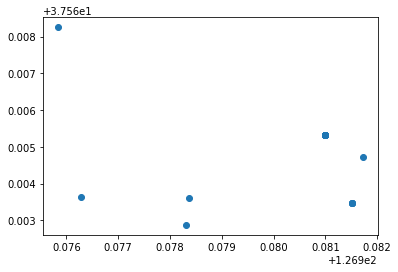

In [26]:
coords = []

for element in json_object['body']['items']:
    #print(element)
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')

C:\Users\dhl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dhl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dhl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dhl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dhl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dhl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.

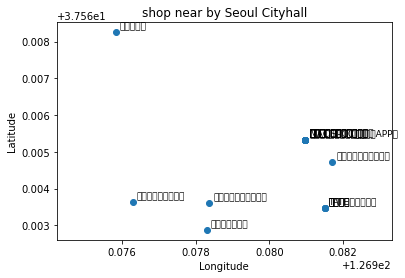

In [27]:
coords = []

#아래 코드처럼 데이터프레임의 정보를 바로 표시해도 됨 
plt.plot(df_shop['lon'], df_shop['lat'], 'o')
plt.title('shop near by Seoul Cityhall') #제목에 한글을 넣으면 어떻게 될까요?
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')

for idx, row in df_shop.iterrows():   
    plt.text(row.lon + 0.0001, row.lat + 0.0001, row['bizesNm'], fontsize=9) #bizesId

plt.show()

## 의문점

### 데이터 관련 의문점

- 엑셀이나 대량의 텍스트 데이터를 로딩하는 방법은?  
- 로딩한 데이터 중에서 잘못된 데이터들을 검토하는 방법은? 
- 가져온 데이터에서 필요한 부분만 추출하는 방법은?


### 시각화 관련 의문점

- 차트(지도)에 한글 제목은 적용할 수 없을까?
- 차트(지도)의 크기를 크게 볼 수는 없을까?
- 일반적인 웹 지도 서비스처럼 확대/축소/이동 기능을 적용할 수는 없을까? 
- 배경지도를 함께 표시할 수는 없을까?
- 포인트의 크기, 모양, 색상을 바꿀 수 없을까?
- 데이터 유형별로 포인트 심볼을 다르게 적용할 수 없을까?
- 경위도로 표시하니 상하-좌우가 1:1이 아니고 위아래가 약간 찌그러져 보이는데 왜 그런지...1:1로 보이게 할 수는 없을지? 
- 중요한 POI에 Labeling을 할 수는 없을까? 한글은?